# Diabetes Predictions with Machine Learning
## Introduction, Data Gathering and Pre-processing
#### Jack Yan
#### BrainStation, Data Science
#### Next Notebook: Data Modeling and Findings


### Introduction

The American Diabetes Association estimates about 37 million Americans has diabetes in 2019. Of the 37.3 million adults with diabetes, 28.7 million were diagnosed, and 8.5 million were undiagnosed. The cost of undiagnosed diabetes are associated with the following: 

Total estimated cost of diabetes in 2017: 327 billion USD
- Reduced productivity while at work (26.9 billion) for the employed population
- Increased absenteeism (3.3 billion)
- Reduced productivity for those not in the labor force (2.3 billion)
- Lost productive capacity due to early mortality (19.9 billion)

Source: [American Diabetes Association](https://www.diabetes.org/about-us/statistics/cost-diabetes#:~:text=The%20estimated%20total%20economic%20cost,that%20diabetes%20imposes%20on%20society.)

With an early prediction of diabetes, we hope to reduce the costs associated with delayed detection of diabetes.

### Business Questions 

We will attempt to answer the following:

- Can machine learning models provide accurate predictions of whether an individual has diabetes?
- What risk factors are most predictive of diabetes?
- Can we use the most predictive features to create a questionnaire for determining diabetes?

### Data Import and Selection

The data is the 2015 Behavioral Risk Factor Surveillance System survey from the CDC. It is collected by phone yearly across the US.

https://www.cdc.gov/brfss/annual_data/annual_2015.html

The dataset can be downloaded [here](https://www.cdc.gov/brfss/annual_data/2015/files/LLCP2015XPT.zip) as a XPT file.

We will use numpy, pandas, matplotlib, and seaborn for basic dataframe functions and graphing.
Other libraries will be imported as needed.


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Reading xpt file:

In [43]:
df = pd.read_sas('LLCP2015.XPT')

First, we will use the info function to get a some information about the columns and shape of the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


Note that the shape is (441456, 330)

Now to check the entire dataframe with the head function:

In [4]:
# supressing scientific notation for clarity
pd.set_option('display.float_format', lambda x: f'%.{len(str(x%1))-2}f' % x)

# show all columns
pd.set_option('display.max_columns', 330)
df.head()

# https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results/56647748#56647748

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2015000001.0,2015000001.0,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.7815601953474669,3.0,86.3446805860424007,NaN,NaN,NaN,NaN,1.0,0.6141246821308681,341.3848527339589509,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.

The descriptions of each column can be found in the codebook [here](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf). \
Next, columns are selected based on relevant health factors to diabetes such as blood pressure and cholestrol levels, and general individual statistics such as age, income, and sex. We also selected for a few factors that may not be as relevant but could provide interesting results, if they rented their home for example.

Selecting the columns to keep:

In [5]:
df = df[[
    'DIABETE3', '_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100',
    'CVDSTRK3', 'PA1MIN_', '_FRUTSUM', '_VEGESUM', 'MARITAL', 'HLTHPLN1',
    'MEDCOST', 'GENHLTH', 'EMPLOY1', '_LTASTH1', 'DIFFWALK', 'SEX', 'FLUSHOT6',
    'RENTHOM1', 'INTERNET', '_AGE80', 'EDUCA', '_RACEGR3', 'INCOME2'
]]

In [6]:
df.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,PA1MIN_,_FRUTSUM,_VEGESUM,MARITAL,HLTHPLN1,MEDCOST,GENHLTH,EMPLOY1,_LTASTH1,DIFFWALK,SEX,FLUSHOT6,RENTHOM1,INTERNET,_AGE80,EDUCA,_RACEGR3,INCOME2
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,NaN,50.0,217.0,1.0,1.0,2.0,5.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,63.0,4.0,1.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,168.0,24.0,78.0,2.0,2.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,52.0,6.0,1.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,NaN,NaN,2.0,1.0,2.0,4.0,7.0,1.0,NaN,2.0,NaN,1.0,2.0,71.0,4.0,1.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,NaN,100.0,20.0,1.0,1.0,1.0,5.0,8.0,1.0,1.0,2.0,1.0,1.0,2.0,63.0,4.0,1.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,NaN,NaN,200.0,1.0,1.0,2.0,5.0,8.0,1.0,2.0,2.0,2.0,1.0,1.0,61.0,5.0,1.0,77.0


### Data Cleaning

Now that we have our data, we will first deal with all of the null values. \
Then we will look at each column individually and rename it and transform it if needed. The codebook provides information on each column so the process is relatively straightforward.

#### Null values 

Let's take a look at the total number of null values for each column:

In [7]:
df.isnull().sum()

DIABETE3         7
_RFHYPE5         0
TOLDHI2      59154
_CHOLCHK         0
_BMI5        36398
SMOKE100     14255
CVDSTRK3         0
PA1MIN_     152419
_FRUTSUM     43711
_VEGESUM     51117
MARITAL          0
HLTHPLN1         0
MEDCOST          1
GENHLTH          2
EMPLOY1          0
_LTASTH1         0
DIFFWALK     12334
SEX              0
FLUSHOT6     41381
RENTHOM1         0
INTERNET      4310
_AGE80           0
EDUCA            0
_RACEGR3         0
INCOME2       3301
dtype: int64

It looks like the `PA1MIN_` column has by far the most nulls. This is minutes of weekly activity for each individual. We can replace the null values with the median as this is most likely a right skewed distribution. 

Next in the list of a large amount of nulls is `TOLDHI2`. This is is binary so it will be a bit harder for mean or median imputation. We will just discard the nulls here. 

For `_FRUTSUM` and `_VEGESUM`, they are both how many pieces of fruit/vegetable eaten per day. As this is also likely a right skewed distribution, we will replace the null values with the median.

Keeping in mind that we have over 400k entries, we can confidently drop the null values that only account for <10% of the dataset.

In [8]:
df['PA1MIN_'] = df['PA1MIN_'].replace(np.NaN, df['PA1MIN_'].median())
df['_FRUTSUM'] = df['_FRUTSUM'].replace(np.NaN, df['_FRUTSUM'].median())
df['_VEGESUM'] = df['_VEGESUM'].replace(np.NaN, df['_VEGESUM'].median())

In [9]:
#Drop Missing Values
df = df.dropna()
df.shape

(326920, 25)

#### Column processing

For each column, we will refer to the codebook and see if any adjustments are needed.

Each code block will begin with the column name, then a brief description of the column and any necessary changes. Lastly we will list the unique values for that column to make sure we did not miss any values for discrete columns.

In [10]:
# DIABETE3
# Target, adults who have diabetes, pre-diabetes, diabetes during pregnancy or none of above.
# Make diabetes binary, 0 is no diabetes or during pregnancy, pre-diabetes or diabetes is 1

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['DIABETE3'] = df['DIABETE3'].replace({2:0, 3:0, 1:1, 4:1})
df = df[df.DIABETE3 != 7]
df = df[df.DIABETE3 != 9]
df.DIABETE3.unique()

array([0., 1.])

In [11]:
# _RFHYPE5
# Adults who have been told they have high blood pressure
# Binary, 0 is no high BP, 1 is high BP

# Remove all 9 (refused)

df['_RFHYPE5'] = df['_RFHYPE5'].replace({1:0, 2:1})
df = df[df._RFHYPE5 != 9]
df._RFHYPE5.unique()

array([1., 0.])

In [12]:
# TOLDHI2
# Adults who have been told they have high cholestrol
# Binary, 0 is no high cholestrol, 1 is high cholestrol

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['TOLDHI2'] = df['TOLDHI2'].replace({1:0, 2:1})
df = df[df.TOLDHI2 != 7]
df = df[df.TOLDHI2 != 9]
df.TOLDHI2.unique()

array([0., 1.])

In [13]:
# _CHOLCHK
# Adults who have been checked for cholestrol in the past 5 years
# Binary, 0 is no cholestrol check and none within past 5 years, 1 is cholestrol checked

# Remove all 9 (missing)

df['_CHOLCHK'] = df['_CHOLCHK'].replace({1:1, 2:0, 3:0})
df = df[df._CHOLCHK != 9]
df._CHOLCHK.unique()

array([1., 0.])

In [14]:
# _BMI5, BMI ranges from 1-9999 so we can change it into something more readable
# Int, divide BMI by 100 and change to integer

df['_BMI5'] = df['_BMI5'].div(100).round(0).astype('int')
df._BMI5.unique()

array([40, 25, 28, 24, 27, 34, 30, 26, 23, 33, 21, 22, 31, 38, 20, 19, 32,
       37, 36, 29, 35, 18, 45, 39, 47, 16, 43, 55, 49, 42, 17, 41, 48, 44,
       50, 59, 46, 15, 52, 54, 53, 57, 51, 14, 58, 63, 61, 56, 60, 74, 62,
       64, 13, 66, 73, 65, 68, 85, 71, 84, 67, 70, 82, 79, 92, 72, 88, 96,
       81, 12, 77, 69, 75, 91, 76, 87, 89, 95, 83, 98, 86, 80, 90, 78, 97])

In [15]:
# SMOKE100
# Adults who have smoked at least 100 cigarettes
# Binary, 0 is not smoked 100, 1 is smoked at least 100

# Remove all 7 (dont knows)
# Remove all 9 (missing)

df['SMOKE100'] = df['SMOKE100'].replace({1:1, 2:0})
df = df[df.SMOKE100 != 7]
df = df[df.SMOKE100 != 9]
df.SMOKE100.unique()

array([1., 0.])

In [16]:
# CVDSTRK3
# Adults who have had a stroke
# Binary, 0 is no stroke, 1 is have had a stroke

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['CVDSTRK3'] = df['CVDSTRK3'].replace({1:1, 2:0})
df = df[df.CVDSTRK3 != 7]
df = df[df.CVDSTRK3 != 9]
df.CVDSTRK3.unique()

array([0., 1.])

In [17]:
# PA1MIN_, Minutes of activity per week
# Convert to int

df['PA1MIN_'] = df['PA1MIN_'].astype('int')
df.PA1MIN_.unique()

array([  275,   168,   330, ...,  2065,  3367, 10020])

In [18]:
# _FRUTSUM, Total fruits consumed per day
# FLoat, divide by 100 to get number of fruits consumed

df['_FRUTSUM'] = df['_FRUTSUM'].div(100).round(2)
df._FRUTSUM.unique()

array([5.000e-01, 2.400e-01, 1.000e+00, 2.000e+00, 1.290e+00, 3.000e+00,
       1.140e+00, 4.300e-01, 8.600e-01, 3.400e-01, 7.000e-02, 1.670e+00,
       1.430e+00, 0.000e+00, 1.700e-01, 2.900e-01, 3.600e-01, 6.700e-01,
       1.570e+00, 1.330e+00, 1.070e+00, 2.290e+00, 1.000e-01, 6.000e-01,
       1.500e+00, 2.600e-01, 5.700e-01, 8.300e-01, 4.290e+00, 2.140e+00,
       3.000e-01, 1.830e+00, 1.230e+00, 5.000e+00, 1.600e-01, 7.600e-01,
       3.300e-01, 6.200e-01, 5.130e+00, 3.700e-01, 2.000e-01, 1.100e+00,
       7.200e-01, 4.140e+00, 4.400e-01, 1.380e+00, 3.000e-02, 1.400e-01,
       1.300e-01, 4.200e-01, 7.400e-01, 2.430e+00, 8.400e-01, 7.800e-01,
       5.800e-01, 1.170e+00, 2.000e-02, 7.000e+00, 2.100e-01, 1.030e+00,
       4.000e-01, 5.600e-01, 2.800e-01, 1.130e+00, 1.860e+00, 6.000e+00,
       2.070e+00, 6.000e-02, 8.700e-01, 4.700e-01, 4.000e+00, 9.000e-01,
       1.280e+00, 7.100e-01, 1.710e+00, 6.600e-01, 2.300e-01, 4.600e-01,
       2.700e-01, 1.200e+00, 3.330e+00, 3.900e-01, 

In [19]:
# _VEGESUM, Total vegetables consumed per day
# FLoat, divide by 100 to get number of vegetables consumed

df['_VEGESUM'] = df['_VEGESUM'].div(100).round(2)
df._VEGESUM.unique()

array([ 2.17,  0.78,  0.2 , ...,  9.24, 10.59,  8.56])

In [20]:
# MARITAL
# Adults who are married
# Binary, 0 is not anything that is not married, 1 is married

# Remove all 9 (refused)

df['MARITAL'] = df['MARITAL'].replace({1:1, 2:0, 3:0, 4:0, 5:0, 6:0})
df = df[df.MARITAL != 9]
df.MARITAL.unique()

array([1., 0.])

In [21]:
# HLTHPLN1
# Adults who have health care coverage
# Binary, 0 is no coverage, 1 is have coverage

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['HLTHPLN1'] = df['HLTHPLN1'].replace({1:1, 2:0})
df = df[df.HLTHPLN1 != 7]
df = df[df.HLTHPLN1 != 9]
df.HLTHPLN1.unique()

array([1., 0.])

In [22]:
# MEDCOST
# Adults who could not afford a doctor visit due to cost in the past year
# Binary, 1 is could afford, 0 is could not afford

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['MEDCOST'] = df['MEDCOST'].replace({1:0, 2:1})
df = df[df.MEDCOST != 7]
df = df[df.MEDCOST != 9]
df.MEDCOST.unique()

array([1., 0.])

In [23]:
# GENHLTH
# General health of individual
# Ordinal, 1-5, 1 is poor, 5 is excellent

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['GENHLTH'] = df['GENHLTH'].replace({1:5, 2:4, 3:3, 4:2, 5:1})
df = df[df.GENHLTH != 7]
df = df[df.GENHLTH != 9]
df.GENHLTH.unique()

array([1., 3., 4., 2., 5.])

In [24]:
# EMPLOY1
# Adults who are employed
# Binary, 0 is for not working for any reason, 1 is employed or self employed

# Remove all 9 (refused)

df['EMPLOY1'] = df['EMPLOY1'].replace({1:1, 2:1, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0})
df = df[df.EMPLOY1 != 9]
df.EMPLOY1.unique()

array([0., 1.])

In [25]:
# _LTASTH1
# Adults who have asthma
# Binary, 1 is asthma, 0 is no asthma

# Remove all 9 (refused or missing)

df['_LTASTH1'] = df['_LTASTH1'].replace({1:0, 2:1})
df = df[df._LTASTH1 != 9]
df._LTASTH1.unique()

array([1., 0.])

In [26]:
# DIFFWALK
# Adults who have difficulty walking or climbing stairs
# Binary, 1 is difficulty using stairs, 0 is no difficulty

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['DIFFWALK'] = df['DIFFWALK'].replace({1:1, 2:0})
df = df[df.DIFFWALK != 7]
df = df[df.DIFFWALK != 9]
df.DIFFWALK.unique()

array([1., 0.])

In [27]:
# SEX
# Change to female
# Binary, 0 is male, 1 is female, 

df['SEX'] = df['SEX'].replace({1:0, 2:1})
df.SEX.unique()

array([1., 0.])

In [28]:
# FLSHOT6
# Adults who have had a flushot within the past year
# Binary, 1 is flushot, 0 is no flushot

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['FLUSHOT6'] = df['FLUSHOT6'].replace({1:1, 2:0})
df = df[df.FLUSHOT6 != 7]
df = df[df.FLUSHOT6 != 9]
df.FLUSHOT6.unique()

array([1., 0.])

In [29]:
# RENTHOM1
# Adults who own their home
# Binary, 1 is own home, 0 is renting or other arrangement

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['RENTHOM1'] = df['RENTHOM1'].replace({1:1, 2:0, 3:0})
df = df[df.RENTHOM1 != 7]
df = df[df.RENTHOM1 != 9]
df.RENTHOM1.unique()

array([1., 0.])

In [30]:
# INTERNET
# Adults who used the internet within the past month
# Binary, 1 is used internet, 0 is did not use internet

# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['INTERNET'] = df['INTERNET'].replace({1:1, 2:0})
df = df[df.INTERNET != 7]
df = df[df.INTERNET != 9]
df.INTERNET.unique()

array([0., 1.])

In [31]:
# _AGE80
# Remove age 80, that is all 80 or older individuals and not individual age
# Ordinal, age of individual

df = df[df._AGE80 != 80]
df._AGE80.unique()

array([63., 52., 61., 73., 70., 68., 62., 58., 51., 71., 37., 47., 69.,
       54., 25., 38., 76., 75., 42., 40., 78., 55., 79., 49., 74., 77.,
       60., 59., 35., 36., 67., 64., 57., 50., 65., 45., 66., 41., 53.,
       48., 72., 56., 22., 20., 19., 32., 43., 39., 31., 46., 44., 28.,
       27., 34., 33., 30., 23., 29., 18., 21., 26., 24.])

In [32]:
# EDUCA
# Education level attained
# Ordinal, 1 -> 6 level of education from no school(0) to College graduate(6)

# Remove all 9 (refused)

df = df[df.EDUCA != 9]
df.EDUCA.unique()

array([4., 6., 5., 3., 2., 1.])

In [33]:
# _RACEGR3
# Race of individual, the frequency of this survey is overwhelmingly white, non-hispanic
# we will encode this as caucasian 
# Binary, 1 is caucasian, 0 other race

# Remove all 9 (refused)

df['_RACEGR3'] = df['_RACEGR3'].replace({1:1, 2:0, 3:0, 4:0, 5:0})
df = df[df._RACEGR3 != 9]
df._RACEGR3.unique()

array([1., 0.])

In [34]:
# INCOME2
# Income level of individual
# Ordinal, 1 -> 9 income level divided into stratas

# Remove all 77 (not sure)
# Remove all 99 (refused)

df = df[df.INCOME2 != 77]
df = df[df.INCOME2 != 99]
df.INCOME2.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

#### Renaming

Now that all the columns are complete, we will rename the columns for clarity:

In [35]:
df = df.rename(
    columns={
        'DIABETE3': 'Diabetes',
        '_RFHYPE5': 'High_BP',
        'TOLDHI2': 'High_Chol',
        '_CHOLCHK': 'Chol_checked',
        '_BMI5': 'BMI',
        'SMOKE100': 'Smoker',
        'CVDSTRK3': 'Stroke',
        'PA1MIN_': 'Weekly_Activity',
        '_FRUTSUM': 'Fruits',
        '_VEGESUM': 'Vegetables',
        'MARITAL': 'Married',
        'HLTHPLN1': 'Health_Plan',
        'MEDCOST': 'Afford_Doctor',
        'GENHLTH': 'General_Health',
        'EMPLOY1': 'Working',
        '_LTASTH1': 'Asthma',
        'DIFFWALK': 'Difficulty_Walking',
        'SEX': 'Female',
        'FLUSHOT6': 'Flushot',
        'RENTHOM1': 'Own_Home',
        'INTERNET': 'Internet',
        '_AGE80': 'Age',
        'EDUCA': 'Education',
        '_RACEGR3': 'Caucasian',
        'INCOME2': 'Income'
    })

In [36]:
# reseting index after dropping many rows
df = df.reset_index(drop=True)

### EDA

For our exploratory data analysis, we plan to get some basic insights with the dataset to see the correlations, trends and distributions of different variables. 

#### Histograms
First, we will plot the histograms of each variable so we can get an idea of the distribution of each variable.

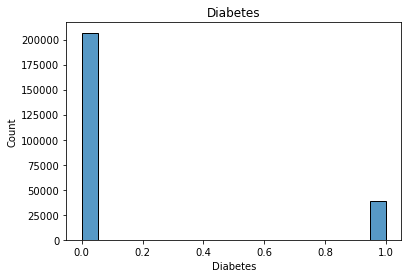

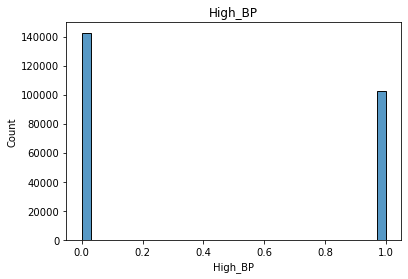

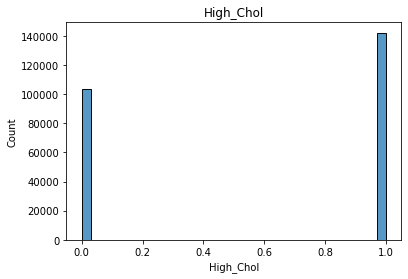

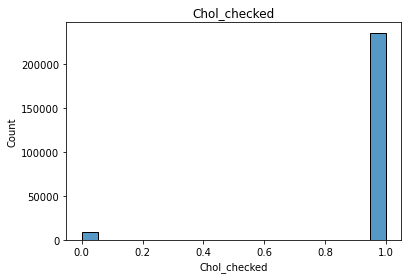

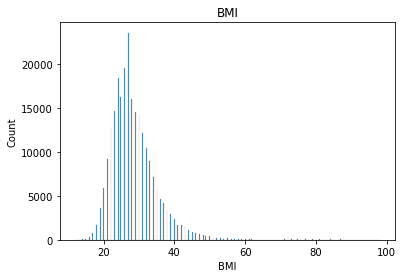

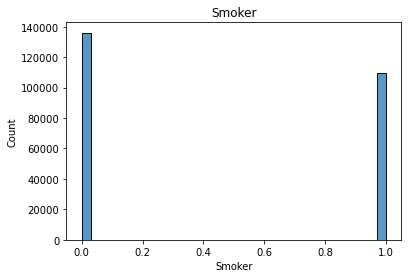

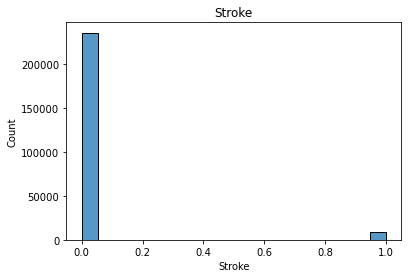

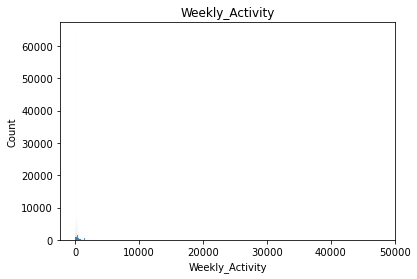

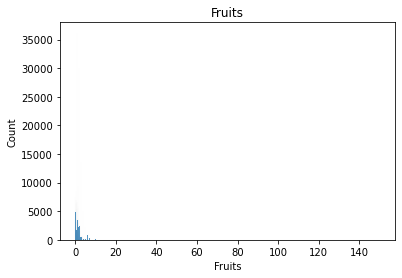

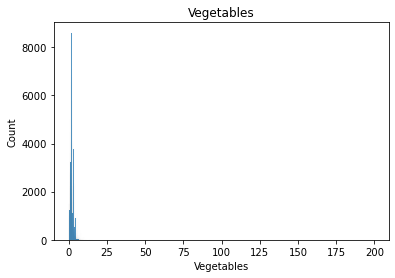

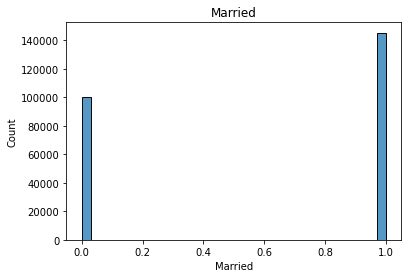

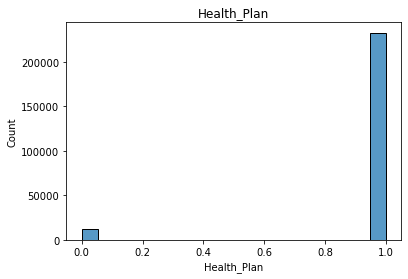

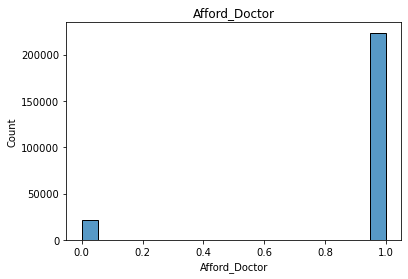

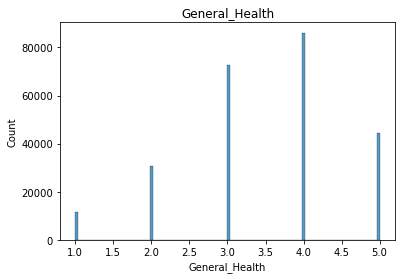

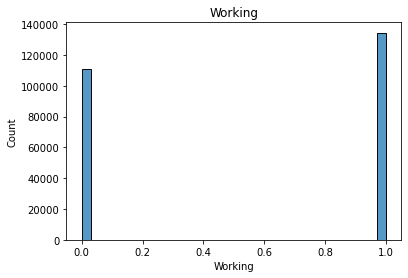

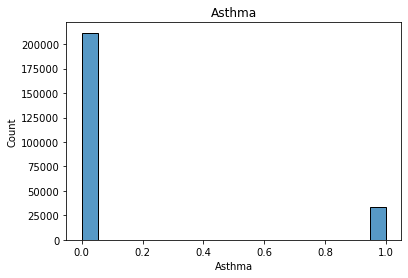

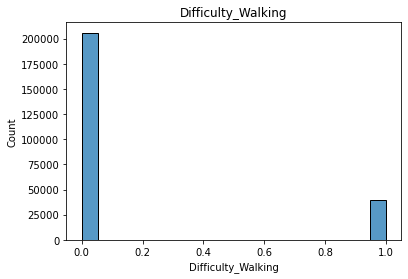

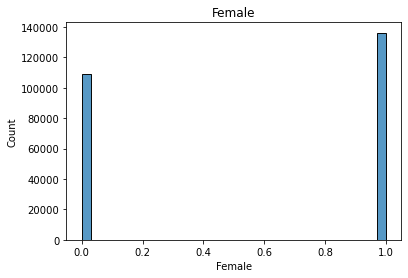

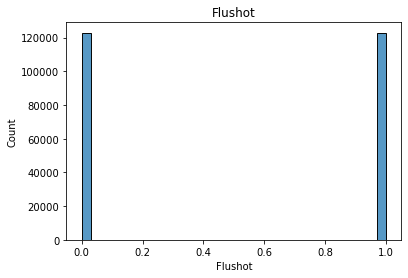

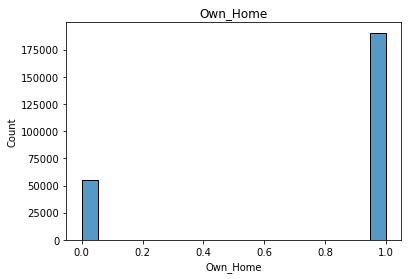

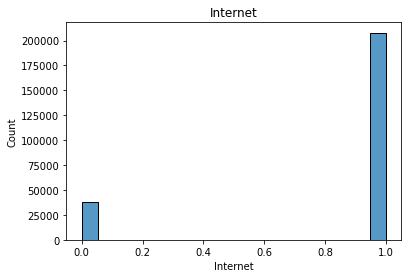

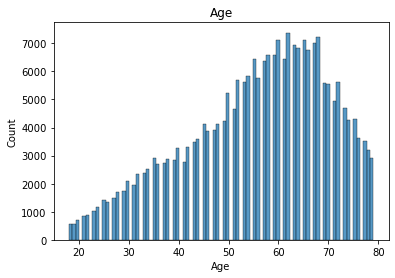

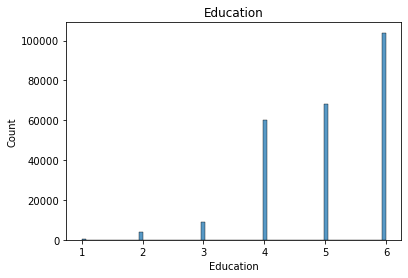

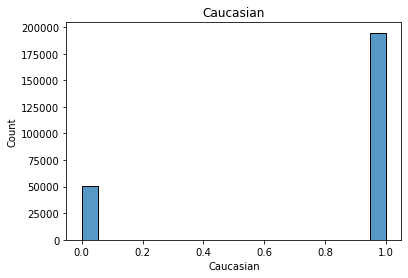

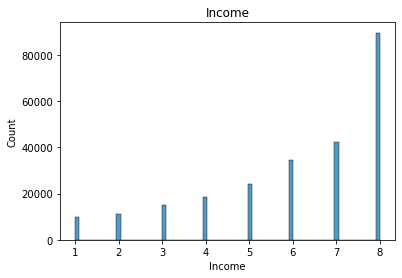

In [37]:
for column in df.columns:
    sns.histplot(x=column, data=df)
    plt.title(column)
    plt.show()

Notes: 
- Diabetes is imbalanced, we will need to address that later using upsampling techniques
- Almost an equal amount of people are working and not working
- Only a small number of people did not finish highschool
- The racial divide in this dataset is somewhat alarming, there are about 4x caucasians listed in this survey compared to other races

#### Correlations

Next, we will look at the correlations of every variable using a heatmap, and also list the correalations of each column compared to the diabetes column and the p-value. 

Multicolinearity is not an issue because we have models that do not require multicolinearity to be addressed but if necessary, we can run a VIF on the model and see if any of the scores are above 10 which could be an area of concern for regression models.

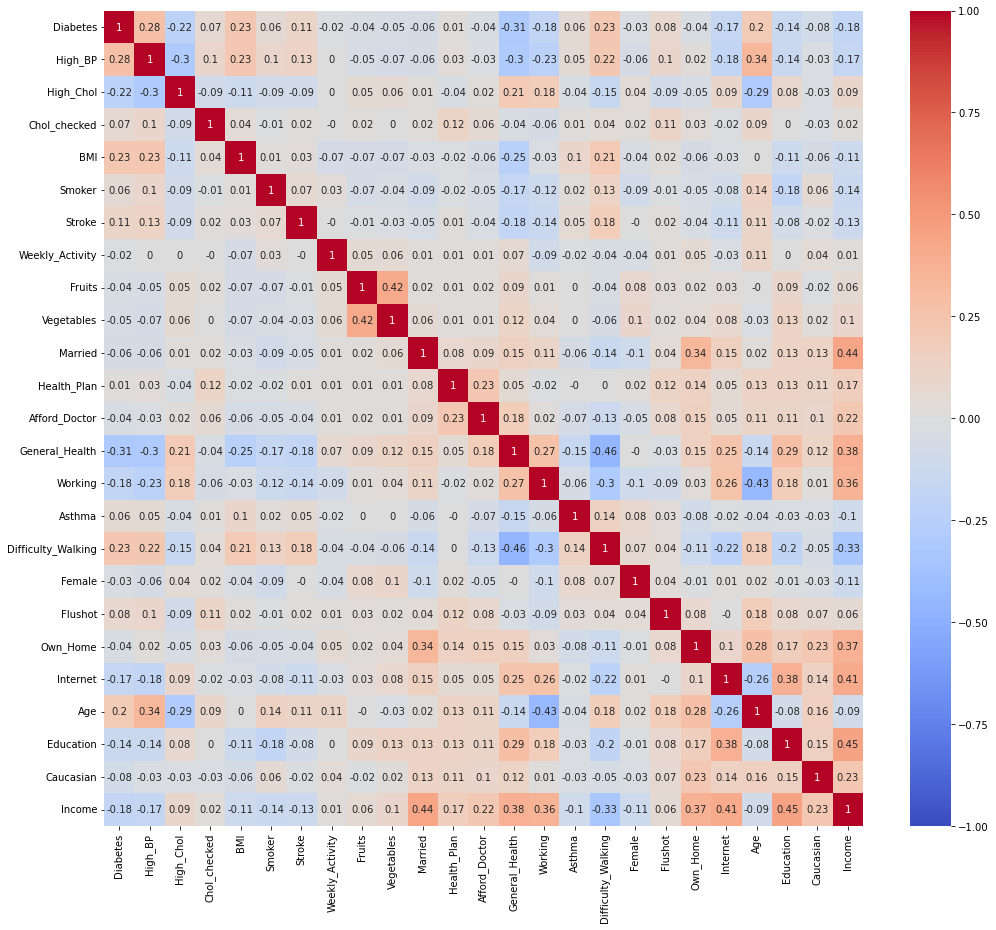

In [38]:
plt.subplots(figsize=(17, 15))
sns.heatmap(df.corr().round(2), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

plt.show()

In [39]:
from scipy import stats
for y in df.columns:
    x = df['Diabetes']
    print(
        f'For the {y} column, the Pearson correlation coefficient and p-value is:\n{stats.pearsonr(x,df[y])}\n'
    )

For the Diabetes column, the Pearson correlation coefficient and p-value is:
(1.0, 0.0)

For the High_BP column, the Pearson correlation coefficient and p-value is:
(0.2795390567230134, 0.0)

For the High_Chol column, the Pearson correlation coefficient and p-value is:
(-0.21777701615154435, 0.0)

For the Chol_checked column, the Pearson correlation coefficient and p-value is:
(0.06881777497187379, 2.721557309662732e-255)

For the BMI column, the Pearson correlation coefficient and p-value is:
(0.23146903362538096, 0.0)

For the Smoker column, the Pearson correlation coefficient and p-value is:
(0.06487118750501811, 4.997926972529931e-227)

For the Stroke column, the Pearson correlation coefficient and p-value is:
(0.10907161498565476, 0.0)

For the Weekly_Activity column, the Pearson correlation coefficient and p-value is:
(-0.019227199970416737, 1.6498993268320576e-21)

For the Fruits column, the Pearson correlation coefficient and p-value is:
(-0.04404303782136694, 1.279833625389595

It looks like all the correlations are significant 

- high blood pressure is positively correlated
- high cholestrol is negatively correlated 
- BMI is positively correlated
- Difficulty walking is positively correlated

### Tableau 
We have created several visualizations in tableau to show some inter-variable relationships.

![](BMI.png) \
In the BMI graph, we see that BMI is a good predictor of diabetes status. Heavier people generally have a higher chance of having diabetes. We have filtered for a BMI between 15 and 55 to reduce variance from smaller sample sizes and added a trendline.

![](Incomegen_health.png)

This graph shows the relationship between income levels and the general health of individuals and diabetes status. We can see that both variables affect diabetes status negatively. That is, increase in general health and income levels will negatively impact your chances of getting diabetes. However, health is generally a stronger predictor than income as the even people in the highest income levels are more likely to suffer from diabetes if their general health is poor. 

![](InternetEducation.png)

This graph shows the relationship between internet access the education level of individuals and diabetes status. We can see that both variables affect diabetes status negatively as well. Increases in education and having access to internet will negatively impact your chances of getting diabetes. Internet is generally a stronger predictor than income as the even people in the highest education levels are more likely to suffer from diabetes if they do not have internet access. We used internet access as a proxy for wealth levels, individuals without internet access is likely to 
The number of individuals that only has an education level of 1(less than grade 6) is quite limited so 

![](Gender.png)

This graph shows the relationship between gender and diabetes status, males are more likely to have diabetes than females.

![](Healthplan.png)

This graph shows the relationship between health care access and diabetes status. Interestingly, individuals who have coverage seems to be more likely to have diabetes.

We will use this new dataframe in the next notebook for modeling so we will save it as a csv.

In [ ]:
df.to_csv('Data_Cleaned.csv', sep=",", index=False)

This notebook covered the introduction to the business case, data cleaning and some basic EDA. In the next notebook, we will cover modeling and findings.